In [1]:
import pickle
!pip install D:\programming\bachelor_projects\NEASE

Processing d:\programming\bachelor_projects\nease
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for nease: filename=nease-1.2.2-py3-none-any.whl size=39880114 sha256=d2b796ace576bcd23eba35dd80088034e9b055ff7d7a99cc84961eeab85d046d
  Stored in directory: C:\Users\gooog\AppData\Local\Temp\pip-ephem-wheel-cache-iatcwvwe\wheels\75\16\f4\c11f2a1a7fe2201b9b7691cb0c6e480fd2ac42e5495345b174
Successfully built nease



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import nease
import pandas as pd

In [2]:
# Diff spliced events in Multiple sclerosis (MS)
# please change file accordinally

table=pd.read_table('../data_nease/AL_NAWM.deltapsi.tsv')

In [4]:
# Run nease with majiq
# "D:/programming/bachelor_projects/NEASE/nease/data/"
events=nease.run(table, organism='Human',input_type='MAJIQ', only_DDIs=False, human_network='data\\network\graph_human_ext', node_degree=66220)
# for the extended: 66220
# for the random: 19296
# for the bronze: 65659
# for the gold_silver: 60724
# original: 60235

Processing MAJIQ format...
MAJIQ output converted successfully to NEASE format.

		Data Summary
**************************************************
19 protein domains are affected by AS.

1 linear motifs are affected by AS.
6 interacting resiude are affected by AS.

17 of the affected domains/motifs have known interactions.
756 protein interactions/binding affected.

**************************************************
Running enrichment analysis...
Degree of PPI/DDI network: 66220


C:\Users\gooog\miniconda3\lib\site-packages\nease\functions.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interacting_domains=interacting_domains[['Gene name','NCBI gene ID','Identifier','dPSI','Affected binding (NCBI)']].append(elm_affected, ignore_index=True)
Error while evaluating expression: c <= 0
Traceback (most recent call last):
  File "C:\Users\gooog\AppData\Local\JetBrains\Toolbox\apps\PyCharm-P\ch-0\231.8109.197\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_utils.py", line 642, in eval_expression
    return eval(expression, globals, locals)
  File "<string>", line 1, in <module>
NameError: name 'c' is not defined


NEASE enrichment done.


In [4]:
# Run on KEGG gene set
enr=events.classic_enrich(gseapy_databases=['Reactome_2016']).head(10)
enr


KeyboardInterrupt



In [ ]:
# Get list of all protein domais affected by AS.
# A link to DIGGER database for lost/gained domain and their binding.


In [ ]:
# get the affected linear motifs
events.get_elm()

In [ ]:
# get interacting residues affected by AS
events.get_pdb()

In [4]:
# Run nease enrichment on affected edges
nease_enr=events.enrich(database=['KEGG'])
nease_enr.head(10)

NEASE enrichment for the pathway databases:
 ['KEGG']
Found 126 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,path:hsa04014,Ras signaling pathway - Homo sapiens (human),KEGG,"MYH10 (1), ATP2B1 (3), BRAF (42), DMD (1), MAP2K4 (7), GRIN1 (4), SYNE1 (1), BTN2A1 (1)",9.465232e-16,1.009625e-13,26.022104
1,path:hsa04010,MAPK signaling pathway - Homo sapiens (human),KEGG,"GRIA1 (1), MYH10 (1), BRAF (43), DMD (3), MAP2K4 (22), GRIN1 (1), SYNE1 (1)",1.742092e-17,5.574693e-15,23.700705
2,path:hsa04080,Neuroactive ligand-receptor interaction - Homo sapiens (human),KEGG,"GRIA1 (4), GRIN1 (20)",3.859839e-17,6.175742e-15,23.212096
3,path:hsa04724,Glutamatergic synapse - Homo sapiens (human),KEGG,"GRIA1 (3), BRAF (5), MAP2K4 (1), GRIN1 (18)",4.994843e-14,3.995875e-12,23.038836
4,path:hsa04024,cAMP signaling pathway - Homo sapiens (human),KEGG,"GRIA1 (2), ATP2B1 (4), BRAF (11), DMD (1), MAP2K4 (6), GRIN1 (10), BTN2A1 (1)",4.762042e-09,1.049503e-07,18.609020
5,path:hsa04015,Rap1 signaling pathway - Homo sapiens (human),KEGG,"ATP2B1 (3), BRAF (34), MAP2K4 (6), GRIN1 (4), BTN2A1 (1)",2.125609e-11,7.557721e-10,18.485341
6,path:hsa05033,Nicotine addiction - Homo sapiens (human),KEGG,"GRIA1 (2), GRIN1 (8)",2.932509e-12,1.733705e-10,16.309787
7,path:hsa04012,ErbB signaling pathway - Homo sapiens (human),KEGG,"MYH10 (1), BRAF (33), DMD (1), MAP2K4 (9), GRIN1 (2), BTN2A1 (1)",3.792480e-12,1.733705e-10,16.151841
8,path:hsa04912,GnRH signaling pathway - Homo sapiens (human),KEGG,"ATP2B1 (3), BRAF (15), MAP2K4 (15), GRIN1 (2)",8.338654e-10,2.668369e-08,15.725123
9,path:hsa04722,Neurotrophin signaling pathway - Homo sapiens (human),KEGG,"ATP2B1 (3), BRAF (26), DMD (1), MAP2K4 (12), GRIN1 (1), SYNE1 (1), BTN2A1 (1)",2.237554e-09,5.966811e-08,14.982632


In [6]:
# Run nease enrichment on affected edges
nease_enr=events.enrich(database=['Reactome'])
# pickle.dump(nease_enr, open('data_nease/random_nease_enr_ext.pkl', 'wb'))
nease_enr.head(10)

NEASE enrichment for the pathway databases:
 ['Reactome']
Found 37 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,R-HSA-381753,Olfactory Signaling Pathway,Reactome,"GRIA1 (2), MYH10 (3), BRAF (16), SLC25A25 (3), DMD (9), LRRFIP1 (1), MAP2K4 (2), GRIN1 (15), SYNE1 (10), SNRPA1 (7)",5.923166e-101,1.038923e-97,316.947014
1,R-HSA-418555,G alpha (s) signalling events,Reactome,"GRIA1 (2), MYH10 (4), BRAF (19), SLC25A25 (4), DMD (11), LRRFIP1 (1), MAP2K4 (2), GRIN1 (16), SYNE1 (12), BTN2A1 (1), SNRPA1 (7)",5.689748e-60,4.989909e-57,177.734721
2,R-HSA-372790,Signaling by GPCR,Reactome,"GRIA1 (8), MYH10 (5), ATP2B1 (1), BRAF (49), SLC25A25 (5), DMD (25), LRRFIP1 (2), MAP2K4 (11), GRIN1 (26), SYNE1 (34), BTN2A1 (1), SNRPA1 (22)",9.154807e-20,5.352510e-17,50.370742
3,R-HSA-388396,GPCR downstream signalling,Reactome,"GRIA1 (7), MYH10 (5), ATP2B1 (1), BRAF (48), SLC25A25 (5), DMD (24), LRRFIP1 (2), MAP2K4 (10), GRIN1 (26), SYNE1 (33), BTN2A1 (1), SNRPA1 (22)",1.761830e-18,7.725625e-16,46.972764
4,R-HSA-5173105,O-linked glycosylation,Reactome,"MYH10 (2), BRAF (6), ALDH3A2 (1), GRIN1 (6), SYNE1 (2), BTN2A1 (1)",7.340590e-18,2.575079e-15,41.970216
5,R-HSA-5173214,O-glycosylation of TSR domain-containing proteins,Reactome,"MYH10 (2), BRAF (4), GRIN1 (5), SYNE1 (2), BTN2A1 (1)",1.331467e-17,3.892321e-15,37.735145
6,R-HSA-500792,GPCR ligand binding,Reactome,"GRIA1 (3), MYH10 (1), BRAF (9), DMD (4), MAP2K4 (1), GRIN1 (3), SYNE1 (11), BTN2A1 (1), SNRPA1 (4)",1.783099e-07,4.467937e-05,13.497649
7,R-HSA-1296072,Voltage gated Potassium channels,Reactome,"ATP2B1 (1), BRAF (2), SLC25A25 (1), DMD (1), GRIN1 (2), SYNE1 (1), SNRPA1 (1)",6.567509e-06,1.151941e-03,10.365199
8,R-HSA-2142670,Synthesis of epoxy (EET) and dihydroxyeicosatrienoic acids (DHET),Reactome,"BRAF (1), GRIN1 (2), SNRPA1 (1)",5.368081e-06,1.046179e-03,9.128221
9,R-HSA-2142816,Synthesis of (16-20)-hydroxyeicosatetraenoic acids (HETE),Reactome,"BRAF (1), GRIN1 (2), SNRPA1 (1)",5.368081e-06,1.046179e-03,9.128221


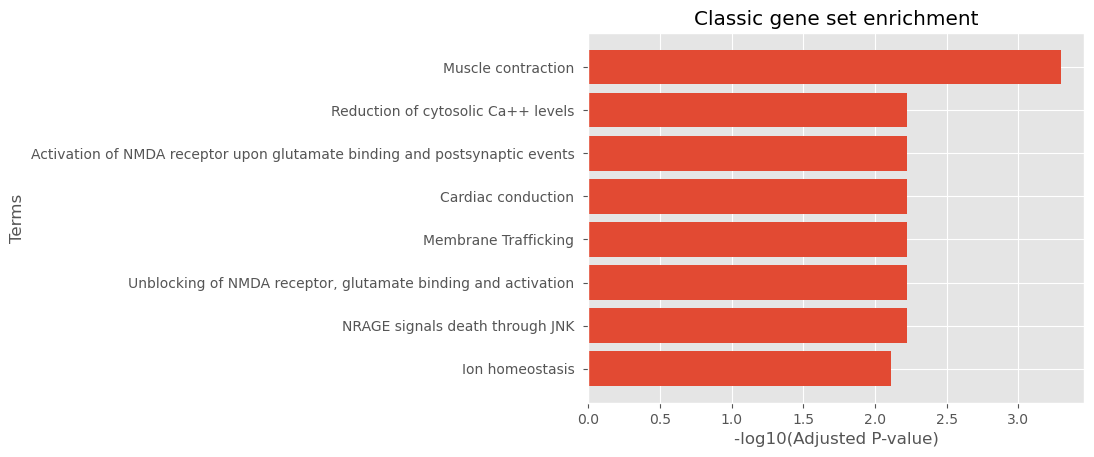

In [14]:
import numpy as np
import matplotlib.pyplot as plt

Term = enr['Term'][:8]
Term = [x.split('Homo')[0] for x in Term]
Pvalues =enr['Adjusted P-value'][:8]
Pvalues=[ -np.log10(x) for x in Pvalues]
plt.style.use('ggplot')

plt.barh(Term[::-1],Pvalues[::-1] )
plt.title('Classic gene set enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
#plt.savefig('AS data/Platelet/classic_enr',format='pdf',bbox_inches='tight')

plt.show()

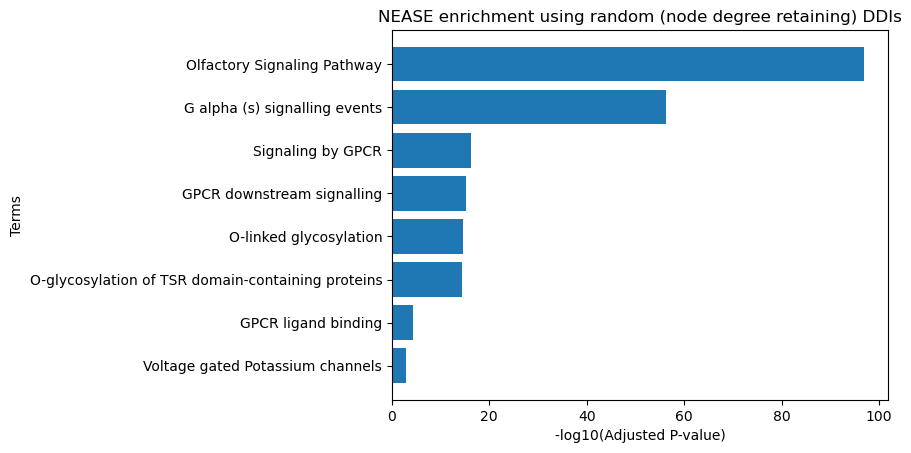

In [10]:
import numpy as np
import matplotlib.pyplot as plt
nease_enr=nease_enr.sort_values(by='Nease score',ascending=False)
Term = nease_enr['Pathway name'][:8]
Pvalues =nease_enr['adj p_value'][:8]
Pvalues=[ -np.log10(x) for x in Pvalues]

plt.barh(Term[::-1],Pvalues[::-1])
plt.title('NEASE enrichment using random (node degree retaining) DDIs')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.savefig('../data_nease/nease_enrichment_ext_random.png',bbox_inches='tight')
plt.show()

In [17]:
events.path_analysis('R-HSA-6794361')

Enrichment of the pathway: Neurexins and neuroligins.

Overall p_value:  5.232157413669317e-16




,Spliced genes,NCBI gene ID,Gene is known to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,GRIN1,2902,True,19/123,9.640193e-23,"GRIN2A,LRRTM4,GRIN2C,DLGAP4,DLG4,DLG3,GRIN2B,DLG2,LIN7A,HOMER1,GRIN1,GRM5,LRRTM3,LRRTM2,DLGAP1,CASK,GRIN2D,DLGAP2,HOMER2","2903,80059,2905,22839,1742,1741,2904,1740,8825,9456,2902,2915,347731,26045,9229,8573,2906,9228,9455"
1,GRIA1,2890,False,2/14,2.208544e-03,"EPB41L1,EPB41L2","2036,2037"
2,DMD,1756,False,3/114,2.017887e-02,"DLG3,DLG2,CASK","1741,1740,8573"
3,MYH10,4628,False,1/33,1.533272e-01,EPB41,2035
4,SYNE1,23345,False,1/94,3.776327e-01,DLG2,1740
5,BRAF,673,False,1/176,5.886100e-01,GRIN1,2902


In [18]:
events.path_analysis('R-HSA-5683057')

Enrichment of the pathway: MAPK family signaling cascades.

Overall p_value:  6.939497170746202e-08




,Spliced genes,NCBI gene ID,Gene is known to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,BRAF,673,True,56/176,4.790315e-22,"RAP1B,FGFR4,JAK3,NRAS,MAPK6,IQGAP1,RAF1,JAK2,JAK1,CDK1,MAP2K2,CAMK2B,MAPK4,MET,CAMK2D,FGFR3,PRKACB,PRKACG,RET,BRAF,ERBB4,KIT,GRIN1,PAK1,FGF9,FGF2,EGFR,RAP1A,PAK2,SHC1,HRAS,FGFR2,MAP2K1,MAPK3,CSK,PDGFRA,CAMK2G,PDGFRB,FYN,CAMK2A,PTPN11,ERBB2,PRKACA,MAPK1,KSR1,FGF20,CNKSR2,ERBB3,KSR2,KRAS,SHC2,PAK3,ARAF,FGFR1,YWHAB,SHC3","5908,2264,3718,4893,5597,8826,5894,3717,3716,983,5605,816,5596,4233,817,2261,5567,5568,5979,673,2066,3815,2902,5058,2254,2247,1956,5906,5062,6464,3265,2263,5604,5595,1445,5156,818,5159,2534,815,5781,2064,5566,5594,8844,26281,22866,2065,283455,3845,25759,5063,369,2260,7529,53358"
1,GRIN1,2902,True,14/123,5.794176e-02,"GRIN2A,RAF1,GRIN2C,SPTAN1,DLG4,GRIN2B,ERBB4,BRAF,GRIN1,PPP5C,PTK2,CAMK2G,FYN,GRIN2D","2903,5894,2905,6709,1742,2904,2066,673,2902,5536,5747,818,2534,2906"
2,MYH10,4628,False,5/33,8.412623e-02,"PAK2,SHC1,IQGAP1,CDC42,GRB2","5062,6464,8826,998,2885"
3,MAP2K4,6416,False,5/34,9.309261e-02,"JUN,MAPK1,UBC,EGFR,MAP3K11","3725,5594,7316,1956,4296"
4,ATP2B1,490,False,1/5,3.106914e-01,CALM1,801
5,SLC25A25,114789,False,2/30,6.441481e-01,"SPTAN1,DUSP1","6709,1843"
6,DMD,1756,False,4/114,9.671303e-01,"IQGAP1,VCL,CSK,FYN","8826,7414,1445,2534"
7,SYNE1,23345,False,2/94,9.924423e-01,"IQGAP1,VCL","8826,7414"
